In [1]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Neural Network related imports
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l1, l2
from keras.utils import to_categorical

# Advanced models
from minisom import MiniSom  # For SOM
from sklearn.cluster import KMeans  # For RBFN
from sklearn.metrics.pairwise import rbf_kernel  # For RBFN

# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Load the dataset
file_path = "C:/Users/ejlal/OneDrive/Desktop/diabetes_prediction_dataset.csv"
diabetes_data = pd.read_csv(file_path)

In [4]:
# Display basic info
print("Dataset Info:")
print(diabetes_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [5]:
print("\nFirst 5 rows:")
print(diabetes_data.head())


First 5 rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [6]:
# Data Cleaning and Preprocessing
print("\nChecking for missing values:")
print(diabetes_data.isnull().sum())


Checking for missing values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [7]:
# Convert categorical variables to numerical
diabetes_data['gender'] = diabetes_data['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
diabetes_data['smoking_history'] = diabetes_data['smoking_history'].map({
    'never': 0,
    'No Info': 1,
    'current': 2,
    'former': 3,
    'ever': 4,
    'not current': 5
})

In [8]:
# Feature Engineering
# Let's create some interaction terms that might be relevant
diabetes_data['bmi_age_interaction'] = diabetes_data['bmi'] * diabetes_data['age']
diabetes_data['glucose_bp_interaction'] = diabetes_data['blood_glucose_level'] * diabetes_data['hypertension']

In [9]:
# Split into features and target
X = diabetes_data.drop('diabetes', axis=1)
y = diabetes_data['diabetes']


In [10]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
print("\nClass distribution in training set:", y_train.value_counts(normalize=True))
print("Class distribution in test set:", y_test.value_counts(normalize=True))


Class distribution in training set: diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64
Class distribution in test set: diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


In [13]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape  # This line defines n_features
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Convert y to -1 or 1
        y_ = np.where(y <= 0, -1, 1)
        
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) + self.bias) >= 0
                if not condition:
                    update = self.learning_rate * y_[idx]
                    self.weights += update * x_i
                    self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

In [14]:
# Train and evaluate perceptron
perceptron = Perceptron(learning_rate=0.01, n_iterations=10)
perceptron.fit(X_train_scaled, y_train)
y_pred_perceptron = perceptron.predict(X_test_scaled)

In [15]:
print("\nPerceptron Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_perceptron))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_perceptron))
print("Classification Report:\n", classification_report(y_test, y_pred_perceptron))


Perceptron Results:
Accuracy: 0.085
Confusion Matrix:
 [[    0 18300]
 [    0  1700]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     18300
           1       0.09      1.00      0.16      1700

    accuracy                           0.09     20000
   macro avg       0.04      0.50      0.08     20000
weighted avg       0.01      0.09      0.01     20000



C:\Users\ejlal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ejlal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ejlal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
def build_mlp_model(input_dim, activation='relu', optimizer='adam', regularizer=None, dropout_rate=0.0):
    model = Sequential()
    

In [17]:
def build_layer(input_dim=None, activation='relu', regularizer=None, dropout_rate=0.0):
    """Builds a complete layer with all specified components"""
    # First create the model
    model = Sequential()
    
    # Validate input_dim is provided
    if input_dim is None:
        raise ValueError("input_dim must be specified")
    
    # Input layer with optional regularization
    if regularizer == 'l1':
        model.add(Dense(64, input_dim=input_dim, activation=activation, 
                     kernel_regularizer=l1(0.01)))
    elif regularizer == 'l2':
        model.add(Dense(64, input_dim=input_dim, activation=activation, 
                     kernel_regularizer=l2(0.01)))
    else:
        model.add(Dense(64, input_dim=input_dim, activation=activation))
    
    # Optional dropout
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    
    # Batch normalization
    model.add(BatchNormalization())
    
    return model

# Example usage:
# input_dim = X_train.shape[1]  # You need to define this from your data
# model = build_layer(input_dim=input_dim, activation='relu', regularizer='l2', dropout_rate=0.3)

In [18]:
# Hidden layers - fixed version
def add_hidden_layers(model, activation='relu', dropout_rate=0.0):
    """Adds hidden layers to the model with specified activation and dropout"""
    model.add(Dense(32, activation=activation))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    return model

# Example usage:
# model = add_hidden_layers(model, activation='relu', dropout_rate=0.2)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# First initialize the Sequential model
model = Sequential()

# Then add the output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Example complete model building would look like:
def build_model(input_dim):
    model = Sequential()
    # Add your layers here
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [20]:
from keras.optimizers import SGD, Adam

def build_mlp_model(input_dim, activation='relu', optimizer='adam', regularizer=None, dropout_rate=0.0):
    """Builds a complete MLP model with specified parameters"""
    model = Sequential()
    
    # Input layer
    if regularizer == 'l1':
        model.add(Dense(64, input_dim=input_dim, activation=activation, 
                     kernel_regularizer=l1(0.01)))
    elif regularizer == 'l2':
        model.add(Dense(64, input_dim=input_dim, activation=activation, 
                     kernel_regularizer=l2(0.01)))
    else:
        model.add(Dense(64, input_dim=input_dim, activation=activation))
    
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    
    model.add(BatchNormalization())
    
    # Hidden layer
    model.add(Dense(32, activation=activation))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    if optimizer == 'sgd':
        opt = SGD(learning_rate=0.01)
    else:  # Default to Adam
        opt = Adam(learning_rate=0.001)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [21]:
# Train MLP with different configurations
input_dim = X_train_scaled.shape[1]
mlp_models = {}

In [22]:
# MLP with ReLU and Adam
mlp_relu_adam = build_mlp_model(input_dim, activation='relu', optimizer='adam')
history_relu_adam = mlp_relu_adam.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
mlp_models['relu_adam'] = mlp_relu_adam

C:\Users\ejlal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# MLP with Sigmoid and SGD
mlp_sigmoid_sgd = build_mlp_model(input_dim, activation='sigmoid', optimizer='sgd')
history_sigmoid_sgd = mlp_sigmoid_sgd.fit(X_train_scaled, y_train, epochs=10, batch_size=32, 
                                          validation_split=0.2, verbose=0)
mlp_models['sigmoid_sgd'] = mlp_sigmoid_sgd

C:\Users\ejlal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# MLP with Tanh and Adam with L2 regularization
mlp_tanh_adam_l2 = build_mlp_model(input_dim, activation='tanh', optimizer='adam', regularizer='l2')
history_tanh_adam_l2 = mlp_tanh_adam_l2.fit(X_train_scaled, y_train, epochs=10, batch_size=32, 
                                            validation_split=0.2, verbose=0)
mlp_models['tanh_adam_l2'] = mlp_tanh_adam_l2


C:\Users\ejlal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# MLP with Dropout
mlp_relu_adam_dropout = build_mlp_model(input_dim, activation='relu', optimizer='adam', dropout_rate=0.3)
history_relu_adam_dropout = mlp_relu_adam_dropout.fit(X_train_scaled, y_train, epochs=10, batch_size=32, 
                                                     validation_split=0.2, verbose=0)
mlp_models['relu_adam_dropout'] = mlp_relu_adam_dropout

C:\Users\ejlal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# Evaluate all MLP models
print("\nMLP Models Evaluation:")
for name, model in mlp_models.items():
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"{name}: Test Accuracy = {accuracy:.4f}, Test Loss = {loss:.4f}")


MLP Models Evaluation:
relu_adam: Test Accuracy = 0.9701, Test Loss = 0.0894
sigmoid_sgd: Test Accuracy = 0.9591, Test Loss = 0.1104
tanh_adam_l2: Test Accuracy = 0.9640, Test Loss = 0.1067
relu_adam_dropout: Test Accuracy = 0.9656, Test Loss = 0.0932


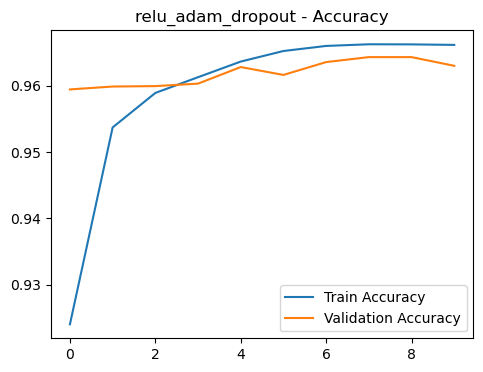

In [56]:
   # Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(globals()[f'history_{name}'].history['accuracy'], label='Train Accuracy')
plt.plot(globals()[f'history_{name}'].history['val_accuracy'], label='Validation Accuracy')
plt.title(f'{name} - Accuracy')
plt.legend()

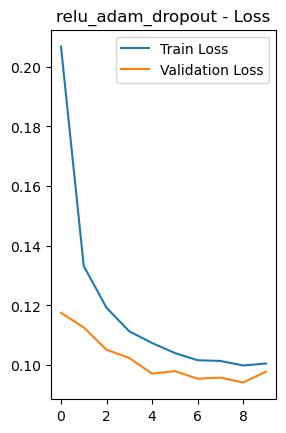

In [60]:
plt.subplot(1, 2, 2)
plt.plot(globals()[f'history_{name}'].history['loss'], label='Train Loss')
plt.plot(globals()[f'history_{name}'].history['val_loss'], label='Validation Loss')
plt.title(f'{name} - Loss')
plt.legend()
plt.show()

In [64]:
# SOM implementation
print("\nSelf-Organizing Maps (SOM):")
# Normalize data for SOM
scaler_som = MinMaxScaler()
X_train_som = scaler_som.fit_transform(X_train)
X_test_som = scaler_som.transform(X_test)


Self-Organizing Maps (SOM):


In [66]:
# Define SOM parameters
som_shape = (10, 10)
input_len = X_train_som.shape[1]
sigma = 1.0
learning_rate = 0.5

In [68]:
# Initialize SOM
som = MiniSom(som_shape[0], som_shape[1], input_len, sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X_train_som)

In [70]:
# Train SOM
som.train_random(X_train_som, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.22512026661488022


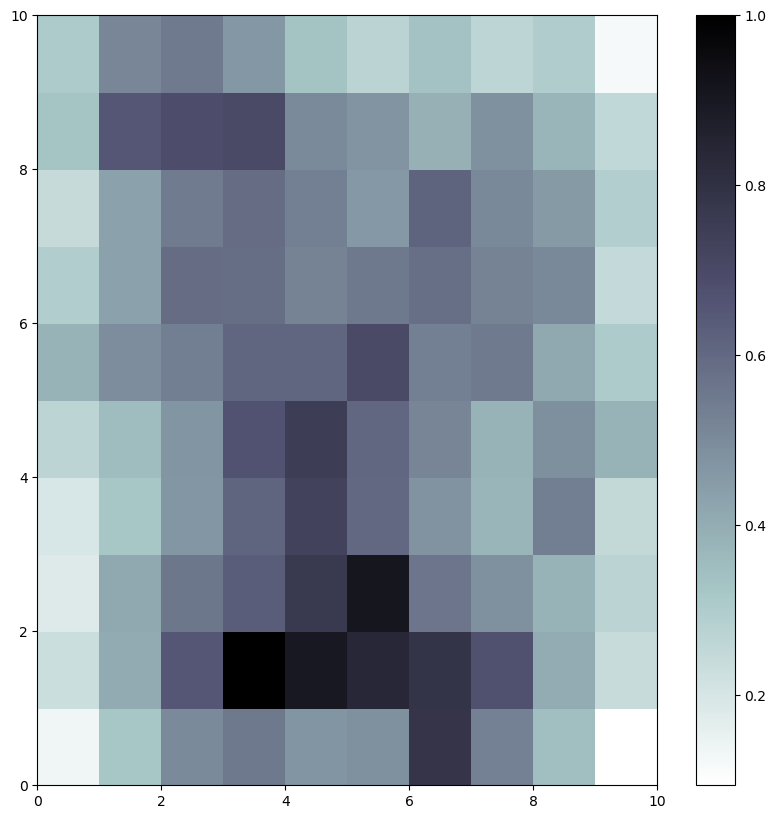

In [72]:
# Visualize SOM
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # distance map as background
plt.colorbar()

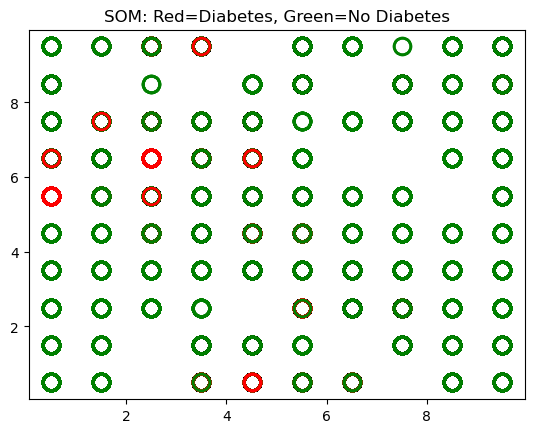

In [74]:
# Mark samples from different classes
for i, (x, t) in enumerate(zip(X_train_som, y_train)):
    w = som.winner(x)
    plt.plot(w[0]+0.5, w[1]+0.5, 'o', markerfacecolor='None',
             markeredgecolor='red' if t == 1 else 'green', markersize=12, markeredgewidth=2)
plt.title("SOM: Red=Diabetes, Green=No Diabetes")
plt.show()

In [76]:
# Cluster patients based on SOM
def som_cluster(som, data, y):
    clusters = {}
    for i, (x, t) in enumerate(zip(data, y)):
        w = som.winner(x)
        if w not in clusters:
            clusters[w] = {'diabetes': 0, 'no_diabetes': 0}
        if t == 1:
            clusters[w]['diabetes'] += 1
        else:
            clusters[w]['no_diabetes'] += 1
    return clusters

train_clusters = som_cluster(som, X_train_som, y_train)
print("\nSOM Clusters (Training Data):")
for cluster, counts in train_clusters.items():
    print(f"Cluster {cluster}: Diabetes={counts['diabetes']}, No Diabetes={counts['no_diabetes']}")


SOM Clusters (Training Data):
Cluster (3, 0): Diabetes=524, No Diabetes=577
Cluster (0, 1): Diabetes=0, No Diabetes=1244
Cluster (0, 6): Diabetes=93, No Diabetes=598
Cluster (9, 7): Diabetes=29, No Diabetes=1207
Cluster (8, 6): Diabetes=0, No Diabetes=897
Cluster (6, 9): Diabetes=0, No Diabetes=1293
Cluster (8, 2): Diabetes=1, No Diabetes=1037
Cluster (6, 5): Diabetes=1, No Diabetes=284
Cluster (8, 9): Diabetes=2, No Diabetes=1147
Cluster (3, 9): Diabetes=398, No Diabetes=1131
Cluster (9, 8): Diabetes=91, No Diabetes=248
Cluster (9, 5): Diabetes=6, No Diabetes=1606
Cluster (0, 4): Diabetes=0, No Diabetes=232
Cluster (5, 3): Diabetes=14, No Diabetes=391
Cluster (8, 0): Diabetes=8, No Diabetes=1595
Cluster (9, 9): Diabetes=27, No Diabetes=957
Cluster (2, 4): Diabetes=34, No Diabetes=523
Cluster (2, 9): Diabetes=314, No Diabetes=484
Cluster (4, 1): Diabetes=106, No Diabetes=1111
Cluster (7, 2): Diabetes=287, No Diabetes=1365
Cluster (7, 3): Diabetes=5, No Diabetes=786
Cluster (0, 7): Dia

In [82]:
print("\nRadial Basis Function Network (RBFN):")
# RBFN implementation
class RBFN:
    def __init__(self, k=10):
        self.k = k
        self.centers = None
        self.weights = None
        self.beta = None


Radial Basis Function Network (RBFN):


In [86]:
def fit(self, X, y):
        # Use K-means to find centers
        kmeans = KMeans(n_clusters=self.k)
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_
        
        # Calculate beta (spread parameter)
        d_max = np.max([np.linalg.norm(c1 - c2) for c1 in self.centers for c2 in self.centers])
        self.beta = 1 / (2 * (d_max / np.sqrt(2 * self.k)) ** 2)
        
        # Calculate RBF activations
        rbf_activations = rbf_kernel(X, self.centers, gamma=self.beta)
        
        # Add bias term
        rbf_activations = np.hstack([rbf_activations, np.ones((X.shape[0], 1))])
        
        # Solve for weights using least squares
        self.weights = np.linalg.pinv(rbf_activations.T @ rbf_activations) @ rbf_activations.T @ y

In [88]:
  def predict(self, X):
        rbf_activations = rbf_kernel(X, self.centers, gamma=self.beta)
        rbf_activations = np.hstack([rbf_activations, np.ones((X.shape[0], 1))])
        return np.where(rbf_activations @ self.weights > 0.5, 1, 0)

In [96]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, ClassifierMixin

class RBFN(BaseEstimator, ClassifierMixin):
    def __init__(self, k=10, gamma=None):
        self.k = k  # Number of RBF centers
        self.gamma = gamma  # Gamma parameter for RBF kernel
        self.centers = None
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Step 1: Find RBF centers using K-means
        kmeans = KMeans(n_clusters=self.k, random_state=42)
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_
        
        # Step 2: Calculate gamma if not specified
        if self.gamma is None:
            # Use heuristic: gamma = 1/(2*median_distance^2)
            from sklearn.metrics.pairwise import euclidean_distances
            distances = euclidean_distances(self.centers)
            median_dist = np.median(distances[np.triu_indices_from(distances, k=1)])
            self.gamma = 1.0 / (2.0 * median_dist**2)
        
        # Step 3: Calculate RBF activations
        rbf_activations = rbf_kernel(X, self.centers, gamma=self.gamma)
        
        # Add bias term (column of 1s)
        rbf_activations = np.hstack([rbf_activations, np.ones((X.shape[0], 1))])
        
        # Step 4: Solve for weights using least squares
        self.weights = np.linalg.pinv(rbf_activations.T @ rbf_activations) @ rbf_activations.T @ y
        
        return self
    
    def predict(self, X):
        # Calculate RBF activations for new data
        rbf_activations = rbf_kernel(X, self.centers, gamma=self.gamma)
        rbf_activations = np.hstack([rbf_activations, np.ones((X.shape[0], 1))])
        
        # Make predictions (convert to binary 0/1 for classification)
        y_pred = rbf_activations @ self.weights
        return np.where(y_pred > 0.5, 1, 0)
    
    def predict_proba(self, X):
        """Predict probability scores"""
        rbf_activations = rbf_kernel(X, self.centers, gamma=self.gamma)
        rbf_activations = np.hstack([rbf_activations, np.ones((X.shape[0], 1))])
        return rbf_activations @ self.weights

# Now you can train and evaluate properly:
rbfn = RBFN(k=10)
rbfn.fit(X_train_scaled, y_train)
y_pred_rbfn = rbfn.predict(X_test_scaled)

In [98]:
print("RBFN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbfn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbfn))
print("Classification Report:\n", classification_report(y_test, y_pred_rbfn))

RBFN Results:
Accuracy: 0.94185
Confusion Matrix:
 [[18235    65]
 [ 1098   602]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     18300
           1       0.90      0.35      0.51      1700

    accuracy                           0.94     20000
   macro avg       0.92      0.68      0.74     20000
weighted avg       0.94      0.94      0.93     20000



In [102]:
# Anomaly detection using RBFN activations
rbf_activations = rbf_kernel(X_train_scaled, rbfn.centers, gamma=rbfn.gamma)  # Changed beta to gamma
anomaly_scores = 1 - np.max(rbf_activations, axis=1)
anomaly_threshold = np.percentile(anomaly_scores, 95)  # Top 5% as anomalies
anomalies = X_train[anomaly_scores > anomaly_threshold]

print(f"\nDetected {len(anomalies)} potential anomalies (unusual cases)")
print("Anomaly cases:")
print(anomalies)


Detected 4000 potential anomalies (unusual cases)
Anomaly cases:
       gender   age  hypertension  heart_disease  smoking_history    bmi  \
5752        1  54.0             1              0                2  33.74   
75770       1  49.0             1              0                1  27.32   
98617       1  70.0             0              1                5  43.17   
87190       1  65.0             0              0                0  30.95   
23820       1  64.0             1              0                0  38.79   
...       ...   ...           ...            ...              ...    ...   
81872       0  45.0             1              0                3  45.65   
81418       0  68.0             1              0                1  40.53   
13235       1  62.0             0              0                4  31.96   
14453       0  40.0             0              0                0  33.46   
84514       0  80.0             1              0                5  29.60   

       HbA1c_level  b

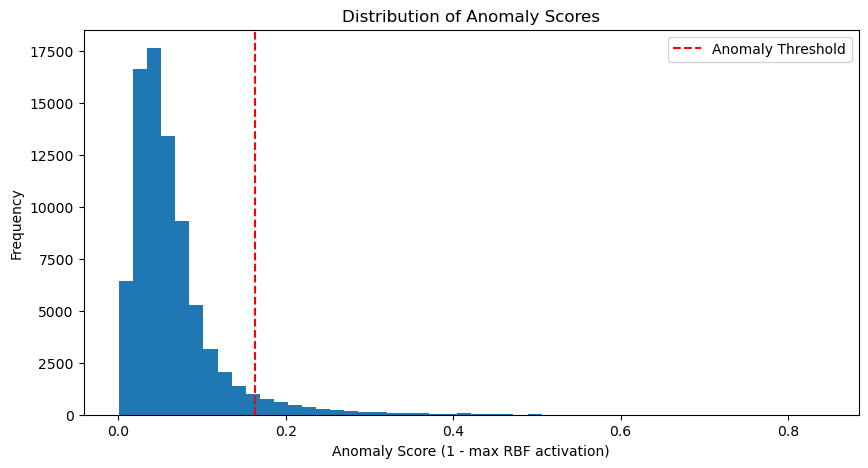

In [104]:
# Optional: Visualize anomaly scores
plt.figure(figsize=(10, 5))
plt.hist(anomaly_scores, bins=50)
plt.axvline(x=anomaly_threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score (1 - max RBF activation)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [106]:
print("\nBidirectional Associative Memory (BAM):")
class BAM:
    def __init__(self):
        self.W = None
    
    def fit(self, X, y):
        # Convert to bipolar representation (-1 and 1)
        X_bipolar = 2 * X - 1
        y_bipolar = 2 * y.values.reshape(-1, 1) - 1
        
        # Create association pairs
        pairs = [ (x.reshape(-1, 1), y.reshape(-1, 1)) for x, y in zip(X_bipolar, y_bipolar) ]
        
        # Calculate weight matrix
        self.W = np.zeros((X_bipolar.shape[1], y_bipolar.shape[1]))
        for x, y in pairs:
            self.W += x @ y.T
    
    def predict_x_to_y(self, x):
        x_bipolar = 2 * x - 1
        y_bipolar = np.sign(self.W.T @ x_bipolar.reshape(-1, 1))
        return (y_bipolar + 1) // 2
    
    def predict_y_to_x(self, y):
        y_bipolar = 2 * y - 1
        x_bipolar = np.sign(self.W @ y_bipolar.reshape(-1, 1))
        return (x_bipolar + 1) // 2


Bidirectional Associative Memory (BAM):


In [108]:
# Create a simplified version for demonstration (using only binary features)
# Select binary features (hypertension and heart_disease)
X_bam = X[['hypertension', 'heart_disease']]
y_bam = y

In [112]:
import numpy as np

class BAM:
    def __init__(self):
        self.W = None
    
    def fit(self, X, y):
        # Convert to numpy arrays if they aren't already
        X = np.array(X)
        y = np.array(y)
        
        # Ensure proper shapes
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)  # Reshape y to column vector if needed
            
        # Convert to bipolar representation (-1 and 1)
        X_bipolar = 2 * X - 1
        y_bipolar = 2 * y - 1
        
        # Create association pairs
        self.W = np.zeros((X_bipolar.shape[1], y_bipolar.shape[1]))
        for x, y_pair in zip(X_bipolar, y_bipolar):
            self.W += np.outer(x, y_pair)
    
    def predict_x_to_y(self, x):
        x = np.array(x)
        x_bipolar = 2 * x - 1
        y_bipolar = np.sign(self.W.T @ x_bipolar.reshape(-1, 1))
        return (y_bipolar + 1) // 2
    
    def predict_y_to_x(self, y):
        y = np.array(y)
        y_bipolar = 2 * y - 1
        x_bipolar = np.sign(self.W @ y_bipolar.reshape(-1, 1))
        return (x_bipolar + 1) // 2

# Prepare proper input data (using binary features)
X_bam = X[['hypertension', 'heart_disease']].values  # Convert to numpy array
y_bam = y.values.reshape(-1, 1)  # Ensure y is column vector

# Train BAM
bam = BAM()
bam.fit(X_bam, y_bam)

# Test BAM
print("Testing BAM with some examples:")
test_cases = np.array([
    [1, 1],  # Both hypertension and heart disease
    [0, 0],  # Neither
    [1, 0],  # Only hypertension
    [0, 1]   # Only heart disease
])

for case in test_cases:
    prediction = bam.predict_x_to_y(case)
    print(f"Input: {case} -> Prediction: {'Diabetes' if prediction[0][0] == 1 else 'No Diabetes'}")

Testing BAM with some examples:
Input: [1 1] -> Prediction: Diabetes
Input: [0 0] -> Prediction: No Diabetes
Input: [1 0] -> Prediction: No Diabetes
Input: [0 1] -> Prediction: Diabetes


In [156]:
import gradio as gr
import numpy as np

# History storage (session-based)
history_log = []

def predict_diabetes(gender, age, hypertension, heart_disease, smoking_history, bmi, hba1c, glucose):
    try:
        gender_map = {'Female': 0, 'Male': 1, 'Other': 2}
        smoking_map = {'never': 0, 'No Info': 1, 'current': 2, 'former': 3, 'ever': 4, 'not current': 5}
        gender_num = gender_map[gender]
        smoking_num = smoking_map[smoking_history]
        hypertension_num = int(hypertension)
        heart_disease_num = int(heart_disease)

        bmi_age = bmi * age
        glucose_bp = glucose * hypertension_num

        input_data = np.array([[gender_num, age, hypertension_num, heart_disease_num,
                                smoking_num, bmi, hba1c, glucose, bmi_age, glucose_bp]])

        input_scaled = scaler.transform(input_data)
        model = mlp_models['relu_adam_dropout']
        prob = model.predict(input_scaled)[0][0]
        prediction = "Positive" if prob > 0.5 else "Negative"

        risks = []
        if hypertension_num: risks.append("• Hypertension increases risk")
        if heart_disease_num: risks.append("• Heart disease increases risk")
        if bmi > 30: risks.append(f"• High BMI ({bmi}) indicates obesity risk")
        if glucose > 140: risks.append(f"• High glucose level ({glucose} mg/dL)")
        if hba1c > 6.5: risks.append(f"• HbA1c ({hba1c}) suggests possible diabetes")

        risk_analysis = "\n".join(risks) if risks else "No significant risk factors"

        history_log.append({
            "Gender": gender,
            "Age": age,
            "Hypertension": hypertension,
            "Heart Disease": heart_disease,
            "Smoking": smoking_history,
            "BMI": bmi,
            "HbA1c": hba1c,
            "Glucose": glucose,
            "Prediction": prediction,
            "Probability": f"{prob:.1%}"
        })

        return f"🩺 {prediction}", f"📊 {prob:.1%}", risk_analysis

    except Exception as e:
        return "Error", "Error", f"Error: {e}"

def view_history():
    if not history_log:
        return "⚠️ No predictions made yet."
    history_text = "\n\n".join([
        f"✅ **{entry['Prediction']}** | 🧪 **{entry['Probability']}**\n"
        f"👤 {entry['Gender']}, Age: {entry['Age']}, BMI: {entry['BMI']}, Glucose: {entry['Glucose']}"
        for entry in history_log
    ])
    return history_text

# ✨ Enhanced UI Interface
with gr.Blocks(title="AI Health Advisor", theme=gr.themes.Soft()) as demo:
    gr.HTML("""
        <div style="text-align: center; padding: 1.5rem; background: linear-gradient(to right, #a1c4fd, #c2e9fb); border-radius: 12px; margin-bottom: 20px;">
            <h1 style="font-size: 2.5em; color: #2c3e50;">🧠 AI Health Advisor</h1>
            <p style="font-size: 1.2em; color: black; margin-top: -10px; font-weight: 600;">Ejlal Hameed</p>
            <p style="font-size: 1.2em; color: #34495e;">Predict diabetes risk with clinical precision and AI insights</p>
        </div>
    """)

    with gr.Row():
        with gr.Column():
            gr.Markdown("### 📝 Patient Information")
            gender = gr.Dropdown(["Female", "Male", "Other"], label="Gender")
            age = gr.Slider(0, 120, value=30, label="Age")
            smoking = gr.Dropdown(["never", "No Info", "current", "former", "ever", "not current"], label="Smoking History")

        with gr.Column():
            gr.Markdown("### 💉 Medical Details")
            hypertension = gr.Checkbox(label="Hypertension")
            heart_disease = gr.Checkbox(label="Heart Disease")
            bmi = gr.Slider(10, 70, value=25.0, step=0.1, label="BMI")
            hba1c = gr.Slider(3.0, 15.0, value=5.5, step=0.1, label="HbA1c Level")
            glucose = gr.Slider(50, 300, value=100, step=1, label="Blood Glucose Level")

    gr.Markdown("---")

    with gr.Row():
        submit_btn = gr.Button("🚀 Predict Diabetes Risk", variant="primary")
        history_btn = gr.Button("📜 View Prediction History")

    with gr.Row():
        with gr.Column():
            gr.Markdown("### 📊 Prediction Results")
            prediction = gr.Textbox(label="🩺 Prediction", interactive=False, max_lines=1)
            probability = gr.Textbox(label="📈 Probability", interactive=False, max_lines=1)
            risk = gr.Textbox(label="⚠️ Risk Analysis", lines=5, interactive=False)

        with gr.Column():
            gr.Markdown("### 🗂️ Prediction History")
            history_output = gr.Textbox(label="🧾 Stored History", lines=10, interactive=False)

    submit_btn.click(
        fn=predict_diabetes,
        inputs=[gender, age, hypertension, heart_disease, smoking, bmi, hba1c, glucose],
        outputs=[prediction, probability, risk]
    )

    history_btn.click(
        fn=view_history,
        outputs=history_output
    )

    gr.Markdown("""
        <hr>
        <div style="text-align: center; font-size: 0.9em; color: #95a5a6;">
            © 2025 AI Health Advisor · Designed for academic and educational purposes
        </div>
    """)

demo.launch()


* Running on local URL:  http://127.0.0.1:7874

To create a public link, set `share=True` in `launch()`.


In [158]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']